# **Low Level MLP in PyTorch**
# **Lab 1**

**Submitted by**

---

MD Ether Deowan \\
Student ID: 22303698

**Submitted to**

---

R. Marxer Pau \\
Université de Toulon \\
Campus de La Garde

# Multilayer Perceptron in PyTorch

## Introduction

### Goal
Learn the basics of PyTorch (PT) by working on an artificial classification problem.

### Plan
In this tutorial we will create a set of synthetic data that we will use as an example problem.
Then we will create a MLP model and learn its parameters from the data. Finally we will visualize the different learning measures and the parameters of the model.

In a second part we will modify our data and adapt the hyper-parameters (e.g. number of hidden neurons) of our model to allow better classification.

In the next part we will use the basic functions of PT to understand our process and how PT works. But we will also mention the high level features and aids of PT that facilitate our tasks.


### Usage

 * Respond to exercices in the next cells.
 * Write your code in between the lines:

```
### BEGIN SOLUTION


### END SOLUTION
```

 * You will provide this same notebook completed for assessment.

### Requirements

Python >=3.5

Modules python:
- pytorch >=1.0
- numpy
- matplotlib

### Evaluation considerations
- We take into account the correctness of the solutions but also their generality and quality of the code
- Comment and discuss on the results of all your exercises (in a cell immediately after the results). You may also state the difficulties encountered, lessons learned and your understanding of the problem and solution
- Clean-up your code before submission, do not leave unnecessary code attempts, or if you deem it important, leave them in a way that it is easily understood and with comments/discussion
- We also value the originality of the solutions, don't hesitate in performing unrequested additional tasks in relation to the exercises
- Non-advanced exercises will account for approx. 14/20 of the grade. Advanced exercises will contribute to the remaining score and may compensate for errors in the non-advanced ones
- You may receive help from colleagues on the non-advanced questions, but you must state who has helped you. Approximately 1/20 of the grade is assigned to those that help most.

In [1]:
#@title
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

## 0. With a little help from my friends

Write in the following cell the colleagues (if any) that have helped you with this lab assignment (comma separated if more than one and don't state more than 2).

In [2]:
#@title
# Md Shamin Yeasher Yousha
# Tihan Mahnmud Hossain


## 1. Data generation

In this part, we will generate a data set of 1000 points which is not linearly separable.

#### Create the artificial data sets



### Exercise 1

Create 1000 points of 2 dimensions $(x_0, x_1)$ with their coordinates between 0 et 1 $x_0, x_1 \in [-1, 1)$.



In [3]:
#@title
### BEGIN SOLUTION

# Creating a dataset of 1000 points with 2 dimensions, within the range [-1, 1)
dataset = torch.rand(1000, 2).uniform_(-1, 1) # I have used PyTorch's torch.rand function to
# generate random numbers between 0 and 1 and then scales and shifts the values to fit within
# the range (-1, 1) using the uniform_(-1, 1) method
print('Data set:', dataset) # Printing the dataset for visulisation

# Extracting x and y coordinates from the dataset
x = dataset[:, 0]  # Selecting the first column as x dataset
y = dataset[:, 1]  # Selecting the second column as y dataset

print('X Data set:', x)
print('Y Data set:', y)

### END SOLUTION

Data set: tensor([[ 0.2704, -0.7561],
        [ 0.6625, -0.9208],
        [ 0.4870, -0.4410],
        ...,
        [ 0.8922,  0.9606],
        [-0.2116, -0.3106],
        [-0.5805, -0.2613]])
X Data set: tensor([ 0.2704,  0.6625,  0.4870, -0.3598,  0.9172,  0.2877,  0.4795,  0.3229,
        -0.4336,  0.4217,  0.2035,  0.1310, -0.4520, -0.5976,  0.4594,  0.8015,
        -0.3963, -0.1935,  0.8685, -0.2043, -0.2759,  0.2141,  0.6130, -0.2509,
        -0.2372, -0.1145, -0.6178,  0.3107,  0.6536,  0.6021, -0.0044,  0.0437,
        -0.0037, -0.0431,  0.9773, -0.5339,  0.5332,  0.4400,  0.8224, -0.5504,
        -0.5171, -0.7606,  0.6993,  0.5099,  0.2721,  0.6932, -0.4726,  0.0836,
         0.3110, -0.3624,  0.7895, -0.2619, -0.1427,  0.8748,  0.4132, -0.9890,
         0.0039,  0.7552, -0.7540, -0.7436,  0.0357, -0.7720, -0.4447, -0.4228,
        -0.1925, -0.5827, -0.4823, -0.1706,  0.8411, -0.4889, -0.2647,  0.9135,
         0.0940,  0.8372, -0.4714,  0.0488,  0.6024,  0.3125, -0.7091, -0.36


### Exercise 2

Assign to each point a binary class $y$ (0 ou 1) following the condition:
$$
y = \begin{cases}
1 &\text{if $x_0 > -0.4$ et $x_1 > -0.3$}\\
0 &\text{else}
\end{cases}
$$


In [4]:
#@title
### BEGIN SOLUTION
Y = torch.where(((dataset[:,0]> -0.4) & (dataset[:,1]> -0.3)),torch.tensor(1),torch.tensor(0)) # Creating binary class using given condition
print('Binary class of dataset:',Y)
### END SOLUTION

Binary class of dataset: tensor([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
        1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
        1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
        0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
        0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
        1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
        0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
        0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
        1, 1, 1


### Exercise 3

Create a matrix of data `data` with shape `(1000, 3)` with a point per row, the two first columns contain the points coordinates $(x_0, x_1)$ the last column contains the class $y$.


In [5]:
#@title
### BEGIN SOLUTION
data = torch.stack((x,y,Y),-1)                  # Concatination of each column
print('Concatinated dataset size:',data.size()) # Printing dataset size for validation

print('Concatinated dataset:',data)             # Printing dataset
### END SOLUTION

Concatinated dataset size: torch.Size([1000, 3])
Concatinated dataset: tensor([[ 0.2704, -0.7561,  0.0000],
        [ 0.6625, -0.9208,  0.0000],
        [ 0.4870, -0.4410,  0.0000],
        ...,
        [ 0.8922,  0.9606,  1.0000],
        [-0.2116, -0.3106,  0.0000],
        [-0.5805, -0.2613,  0.0000]])



### Exercise 4

Split the data into 3 sets (on matrix for each): 800 points for `train`, 100 points for `valid` and 100 for `test`


In [6]:
#@title
### BEGIN SOLUTION
train = data[:800]    # Assign 800 points for train dataset
valid = data[800:900] # Assign 100 points for valid dataset
test = data[900:]     # Assign 100 points for test dataset
### END SOLUTION

### Exercise 5

Visualise the data using a scatter plot (`plt.scatter`).


We expect to find something similar to this:

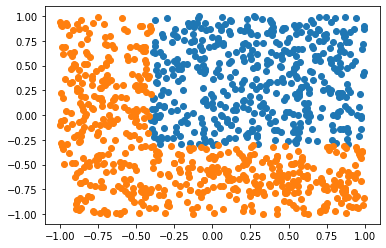

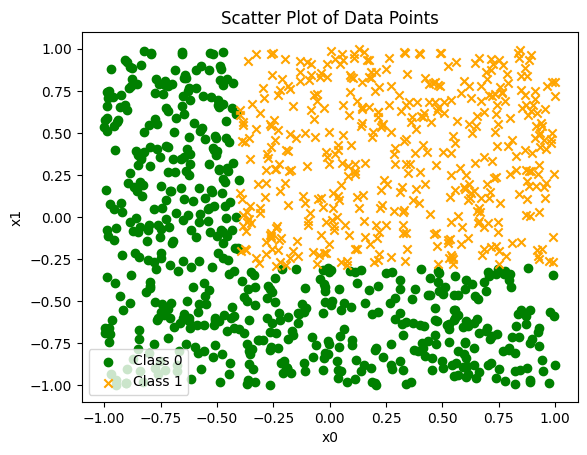

In [7]:
#@title
### BEGIN SOLUTION

def visualize_scatter_plots(data):
  """Scatter plot of data points"""

  plt.figure()

  # Plot points with class 0 as blue circles that holds all the data points labeled as 0
  plt.scatter(data[data[:, 2] == 0, 0], data[data[:, 2] == 0, 1], label='Class 0', c='green', marker='o')

  # Plot points with class 1 as red crosses that contains all the data points labeled as 1
  plt.scatter(data[data[:, 2] == 1, 0], data[data[:, 2] == 1, 1], label='Class 1', c='orange', marker='x')

  # Labels and title
  plt.xlabel('x0')
  plt.ylabel('x1')
  plt.title('Scatter Plot of Data Points')
  plt.legend()
  plt.show()

visualize_scatter_plots(data)
### END SOLUTION

**Run the following cell to make sure you have done the previous exercises correctly.**

In [8]:
#@title
# Verification des dimensions des donnees
assert data.shape == (1000, 3)

# Verification des division desd donnees
assert train.shape == (800, 3)
assert valid.shape == (100, 3)
assert test.shape == (100, 3)

for dataset in [train, valid, test]:
    # Verification des classes
    assert (dataset[dataset[:,-1]==1,0] > -0.4).all()
    assert (dataset[dataset[:,-1]==1,1] > -0.3).all()
    assert ((dataset[dataset[:,-1]==0,0] <= -0.4) | (dataset[dataset[:,-1]==0,1] <= -0.3)).all()

print('Everything looks good!')

Everything looks good!


## 2. Creating the model
In this part, we will create, with PyTorch, a model to predict the class $y$ of a point using only its coordinates $(x_0, x_1)$.

The model we will create to classify the data is a Multilayer Perceptron with a single hidden layer with 2 units:

\begin{align}
h_1 &= \sigma(x W_1 + b_1) \\
\hat{y} &= \sigma(h_1 W_2 + b_2) \\
& \textrm{ avec } & \\
\sigma(t) &= \frac{1}{1+e^{-t}}
\end{align}

$\hat{y}$ will the model's estimation for the class of the point.



### Exercise 6
What are the model parameters?


* There are total 4 parameter
* Two are for hidden layer parameter W1 is weghit and b1 as bais (It have two hidden units)
* Two are for output layer parameter W2 is weghit and b2 as bais

*Implementation en PyTorch*

First we will do a low level implementation where we will only use the auto-differentiation feature (which allows to automatically compute gradients) of PyTorch. Everything else will be using the low-level API which is similar to numpy's.

One major difference between numpy and PyTorch's low-level API is the possibility to compute gradients of some variables. For doing so we will have to set the flag `requires_grad=True` for these variables. This can be done during the construction of the `array` (or rather `tensor` in PyTorch).

For example $W_1$ is a parameter of the model and we are interested in the gradient of the loss with respect to this symbol. So at initialization time we will add the keyword argument `requires_grad=True`.



### Exercise 7

What the dimensions of each of these symbols: $x, y, W_1, b_1, W_2, b_2$?


*  x: (1000x2) - Input data a vector with two features (x0, x1) so the dimension (1x2)
*  y: (1000x1) - y represents the class label and is a scalar value so the dimension (1x1).
* W1: (2x2)    - Weight matrix for the hidden layer with 2 hidden units and 2 input features.
* b1: (1x2)    - Bias for the hidden layer with 2 hidden units.
* W2: (2x1)    - Weight matrix for the output layer with 2 hidden units and 1 output class.
* b2: (1x1)    - Bias for the output layer with 1 output class.


### Exercise 8
Create a function that initializes and returns a tuple with the MLP  parameters.

Initialize the weights $W$ with `torch.randn` and the bias $b$ with `torch.zero` explain why we do so.


In [9]:
#@title

### BEGIN SOLUTION
def init_mlp(input_features, hidden_units, output_classes):
    """
    Initializes the parameters for a Multilayer Perceptron (MLP).
    Args:
    - hidden_units   (int): Number of units in the hidden layer.
    - input_features (int): Number of features in the input data.
    - output_classes (int): Number of classes in the output.
    Returns:

    - tuple: Contains initialized weight matrices (W1, W2) and biases (b1, b2).
    """
    # Initialize the weight matrices and biases with random values
    w1 = torch.randn(input_features, hidden_units,requires_grad=True)   # Initialize the weight matrix W1 with random values based on the number of hidden units and input features.
    b1 = torch.zeros(1,hidden_units,requires_grad=True)                 # bias b1 with random values based on the number of hidden units.
    w2 = torch.randn(hidden_units, output_classes,requires_grad=True)   #  weight matrix W2 with random values based on the number of hidden units and output classes.
    b2 = torch.zeros(1, output_classes,requires_grad=True)              # Initialize the bias b2 with random values based on the number of output classes.
    return (w1, b1, w2, b2) # Returning the parameters as a tuple

hidden_units = 2
input_features = 2
output_classes = 1

mlp_params = init_mlp(hidden_units, input_features, output_classes)
print('mlp_params',mlp_params)

### END SOLUTION

params = init_mlp(2, 2, 1)

mlp_params (tensor([[ 1.4881,  0.1517],
        [ 0.5997, -0.1784]], requires_grad=True), tensor([[0., 0.]], requires_grad=True), tensor([[1.1760],
        [0.8797]], requires_grad=True), tensor([[0.]], requires_grad=True))


*Run a forward pass of the model on the following data points*

### Exercise 8
What is the desired response for the following points?
$$(-0.9, 0.5), (-0.7, -0.5), (0.3, -0.15), (0.1, 0.15)$$





*   For (−0.9,0.5)  point - **0**
*   For (−0.7,−0.5) point - **0**
*   For (0.3,−0.15) pont  - **1**
*   For (0.1,0.15)  point - **1**





### Exercise 9
Execute the model on the previous points and print $\hat{y}$. The matrix multiplication in PyTorch is done with `@`.


In [10]:
#@title
### BEGIN SOLUTION
# Create a function sigmoid(t) that computes the sigmoid function on t
def sigmoid(t):
  return 1 / (1 + torch.exp(-t))


# Create a function mlp(x, params) that computes the MLP outputs given the inputs x
def mlp(x, params):
    """
    Computes the MLP outputs given the inputs x and model parameters.
    Args:
    - x (torch.Tensor): Input data tensor.
    - params   (tuple): Tuple containing the model's parameters (W1, b1, W2, b2).
    Returns:
    - torch.Tensor    : Model's output after the forward pass.
    """

    W1, b1, W2, b2 = params
    h1 = sigmoid(x @ W1 + b1)
    y = sigmoid(h1 @ W2 + b2)
    return y




# Create a tensor containing the previous points
points = torch.tensor([[-0.9, 0.5],
                      [-0.7, -0.5],
                      [0.3, -0.15],
                      [0.1, 0.15]]) # data points


# Call and print output of mlp(points, params) (NOTE: use torch.no_grad())
with torch.no_grad():  # Forward pass and print predictions
  y_pred = mlp(points, params)

print("Predicted Outputs (y^):", y_pred)


### END SOLUTION

Predicted Outputs (y^): tensor([[0.7239],
        [0.6645],
        [0.7255],
        [0.7374]])


We can observe that the results are not good, because they are far from the expected result.

If we want to compute on our test data the performance of the model we will define an accuracy function, which takes a decision for each data based on $\hat{y}$ and compares it to $y$.

$$
\text{accuracy} = \frac{1}{N} \sum_i^N (1 - abs(y - round(\hat{y}_i)))
$$

The accuracy represents the rate of correctly classified points. It will be $1$ if all points are correctly classified, $0$ if all are misclassified and $0.5$ if half are well classified.



### Exercise 10

Implement the accuracy using Pytorch functions `torch.mean`, `torch.abs`, `torch.round`.


In [11]:
#@title

### BEGIN SOLUTION
def accuracy(estimated, reference):
  """
    Computes the accuracy of the model's predictions.
    Args:
    - estimated (torch.Tensor): True labels.
    - reference (torch.Tensor): Predicted labels.
    """
  accu = torch.mean(1-torch.abs(reference - torch.round(estimated)))
  return accu
### END SOLUTION

### Exercise 11

Write a `score_model` function that evaluates the performance (accuracy) of the model on a given data set. Print the result.

When we don't need to compute gradients we may encapsulate the code in a `torch.no_grad()` context block.

In [12]:
#@title

### BEGIN SOLUTION
def score_model(params, data):
  """
  Evaluates the performance (accuracy) of the model on a given dataset.
  Args:
  - params: The MLP model params that computes predictions.
  - data (torch.Tensor): Input data tensor.
  """
  with torch.no_grad():
    estimated = mlp(data[:,:2],params)
  return accuracy(estimated, data[:,2:3])

### END SOLUTION

acc = score_model(params, train).item()
print(f'score train: {acc:.2%}')

score train: 45.12%


### Exercise 12
Do the same with `valid` and `test`


In [13]:
#@title
print(f'score valid: {score_model(params, valid):.2%}')
print(f'score test: {score_model(params,test):.2%}')


score valid: 41.00%
score test: 38.00%


### Exercise 13

Explain the results.

 Given the initial random setup of the neural network's parameters, it’s not surprising to observe a low accuracy across all three datasets: training, validation, and test. This occurs because the neural network hasn’t learned anything yet; it simply categorizes based on the initial random parameters provided to it, which are essentially arbitrary numbers.

Randomly initialized weights and biases mean the model lacks any prior knowledge about the data and doesn’t reflect any learning or patterns from the dataset. As a result, the model essentially makes random guesses based on these random parameters, leading to poor performance and low accuracy.

## 4. Training the model

To find the best parameters for our model we will enter it with the training data. For this we will define a cost function to optimize.

As we are trying to solve a binary classification task, we will use the crossentropy cost function:

$$
L = \sum -y \log(\hat{y}) - (1-y) \log(1-\hat{y})
$$



### Exercise 14
Implement the cost function in PyTorch.


In [14]:
#@title

    ### BEGIN SOLUTION
def bce(est, ref): # binary cross-entropy (BCE) function computes the cross-entropy loss using the formula
  return torch.sum(-ref*torch.log(est)-((1-ref)*(torch.log(1-est))))

with torch.no_grad():
  print(bce(mlp(train[:,:2], params),train[:,2:3]))

    ### END SOLUTION

tensor(628.1199)


To train our model by means of Gradient Descent (GD) we will iteratively update with small increments our parameters:

\begin{align}
W_1^n &= W_1^{n-1} - \eta \frac{\delta L}{\delta W_1} \\
b_1^n &= b_1^{n-1} - \eta \frac{\delta L}{\delta b_1} \\
W_2^n &= W_2^{n-1} - \eta \frac{\delta L}{\delta W_2} \\
b_2^n &= b_2^{n-1} - \eta \frac{\delta L}{\delta b_2}
\end{align}

Where $\eta$ is our learning rate.

We need to calculate the gradients:
$$
\frac{\delta L}{\delta W_1}, \frac{\delta L}{\delta b_1}, \frac{\delta L}{\delta W_2}, \frac{\delta L}{\delta b_2}
$$

For the gradients of the cost function with respect to the parameters, we could calculate them by hand. But we are lazy. So we will use PyTorch `error.backward()` will do this for us in an optimized way using Dynamic Programming (DP) and populate the tensors with the gradients.

Finally we will run a training of 10 `epochs` with a `batch_size=100`.
For this we will do the following steps:
1. Calculate the number of iterations (`n_iterations`) per epoch (remember that an iteration is an update of the parameters and an epoch is a competing use of all our training data)
2. Create a session
3. Initialize the variables
4. For each epoch (`for epoch in range(n_epochs):`)
    1. Randomly reorder the `train` data (use `torch.randperm()`)
    2. Every 10 epochs evaluate and print the model score on the training data
    3. For each iteration (`for iteration in range(n_iterations):`)
        1. Select a block of `batch_size` examples
        2. *Zero the gradients*
        3. Run the forward pass on the model (`mlp()`)
        4. Compute the loss (`bce()`)
        5. Compute the gradients
        6. *Update the parameters doing gradient descent*

**Note:** Remember that PyTorch keeps track of all the operations you make with tensors to build the DAG graph. In some cases we want to avoid that, such as when setting the gradients to zero or performing the gradient descent update of the parameters. In those cases we may encapsulate the operations inside a `with torch.no_grad():` context clause. Furthermore the `grad` attribute of the tensors, may be `None` (no need to set to zero in this case) during the first run so one may do:

```
with torch.no_grad():
    if param.grad is not None:
        param.grad.zero_()

```

**Note:** When performing the parameter update of gradient descent, make sure not to reassign to the parameter a new tensor object. To avoid doing so use an inplace operation:

```
with torch.no_grad():
    param -= eta * param.grad
```

If you erronously do this `param = param - eta * param.grad`, `param` will point to a new tensor, not the original parameters of the model.

**Note:** Zero the gradients means accessing the gradient of each parameter and setting it to zero. We need this because PyTorch `.backward()` method accumulates the gradients instead of replacing them.
    


### Exercise 15

Implement and run a train loop for the model.

In [15]:
#@title


### BEGIN SOLUTION
def train_model(params, data, eta=0.05, n_epochs=1, batch_size=16):
    """
    Trains a neural network model using gradient descent.
    Args:
    - param     : Model parameters weights and biases.
    - data      : Training dataset containing input features and labels.
    - eta       : Learning rate for gradient descent. set as 0.05.
    - n_epochs  : Number of epochs for training. set as 1.
    - batch_size: Size of the mini-batches used during training. Default is 16.
    Returns:
    - Prints Loss on the training data at intervals of every 10 epochs.
    """
    n_data = data.shape[0]
    n_iterations = n_data // batch_size

    for epoch in range(n_epochs):             # Loop over the specified number of epochs
        random_index = torch.randperm(n_data) # random indices of the training data
        D_Train = data[random_index,:]        # random training data

        for iteration in range(n_iterations): # Loop over each mini-batch
            start = iteration * batch_size
            end = (iteration + 1) * batch_size
            batch = D_Train[start:end]        # Get a mini-batch from the shuffled data

            # 1. Zero the gradients of each of the parameters because .bacward() accumulates them
            for param in params:              # Loop over the model parameters
              if param.grad is not None:      # Check if gradient exists
                  param.grad.zero_()          # Zero the gradients

            # 2. Run the forward pass on the model
            estimated = mlp(batch[:, :2], params) # Forward pass: Get model predictions

            # 3. Compute the error
            error = bce(estimated,batch[:,2:3])   # Compute binary cross-entropy error

            # 4. Compute the gradients
            error.backward() # Compute gradients using backpropagation

            # 5. Update the parameters using their gradients
            with torch.no_grad():
                for param in params:          # Loop over the model parameters
                    param -= eta * param.grad # Update the parameters using gradient descent

        # Every 10 epochs, evaluate and print error on training data
        if (epoch + 1) % 10 == 0:
            with torch.no_grad():
                print(f"epoch: {epoch+1}")                    # Print accuracy
                print(f"score: {score_model(params,data):2%}")# Print epoch

### END SOLUTION

params = init_mlp(2, 2, 1) # Initialize the model parameters
train_model(params, train, eta=0.05, n_epochs=100) # Train the model on the training data

epoch: 10
score: 84.375000%
epoch: 20
score: 84.750003%
epoch: 30
score: 90.499997%
epoch: 40
score: 97.750002%
epoch: 50
score: 98.500001%
epoch: 60
score: 98.624998%
epoch: 70
score: 98.750001%
epoch: 80
score: 98.500001%
epoch: 90
score: 99.000001%
epoch: 100
score: 99.250001%


**Discussion:  
After traning the morel the result demonstrates effective learning, with the model achieving a peak accuracy of 99% after 40 epochs. The accuracy remains stable, indicating consistent performance and successful convergence. The chosen hyperparameters seem appropriate for this model, as evidenced by the steady improvement.**

## 5. Visualizing the model

To monitor the evolution of the learning of our model, we will visualize the value of the cost function, the classification score and the parameters of the first layer of our model.  

We will run our experiments with different values of the following hyperparameters to better understand their effect:
- `learning_rate`
- `batch_size`


**Visualization of the cost function**

The cost function is the value we aim to reduce with the training iterations. To visualize it we will create an empty list (`couts = []`) at the beginning of our training and we will add (`couts.append(cout)`) the value resulting from the cost at each iteration. At the end of the training we will visualize the curve (`plt.plot(costs)`).

### Exercise 16
Rewrite the `train_model` function so that it returns the average loss per sample of every epoch. Run it and plot the loss of a training procedure. While we are at it, make the printing optional with an additional keyword argument.

In [16]:
#@title
def train_model(params, data, eta=0.05, n_epochs=1, batch_size=16):
    n_data = data.shape[0]
    n_iterations = n_data // batch_size
    losses = [] # List to store average loss per sample per epoch

    for epoch in range(n_epochs):
        ### BEGIN SOLUTION
        # Randomly reorder the `train` data (use `torch.randperm()`)
        indices = torch.randperm(n_data)
        training_data = data[indices]

        # Evaluate and print the model score on the training data
        with torch.no_grad():
          acc_train = score_model(params, training_data)

        # Init variables to keep track of the average sample loss
        epoch_loss = 0.0

        ### END SOLUTION

        for iteration in range(n_iterations):
            ### BEGIN SOLUTION
            start = iteration * batch_size
            end = (iteration + 1) * batch_size

            # 1. Select a block of `batch_size` examples
            batch = training_data[start:end]  # Getting a mini-batch from the random data

            # 2. Run the forward pass on the model
            predictions = mlp(batch[:, :2], params)

            # 3. Compute the error
            error = bce(predictions, batch[:, 2:3])  # Computetion of the error using bec (binary cross-entropy loss)

            # Update variables to keep track of the average sample loss
            epoch_loss += error.item()

            # 4. Zero the gradients of each of the parameters because .bacward() accumulates them
            for param in params:
                if param.grad is not None:
                    param.grad.zero_()

            # 5. Compute the gradients
            error.backward()  # Compute gradients using backpropagation

            # 6. Update the parameters using their gradients
            with torch.no_grad():
                for param in params:
                    param -= eta * param.grad

        # Every 10 epochs, evaluate and print error on training data
        if (epoch + 1) % 10 == 0:
            with torch.no_grad():
                print(f"epoch: {epoch+1}")                     # Print epoch
                print(f"score: {score_model(params,data):2%}") # Print accuracy

            ### END SOLUTION

        ### BEGIN SOLUTION

        # Collect average sample loss of the epoch
        avg_sam_loss = epoch_loss / n_data
        losses.append(avg_sam_loss)

        ### END SOLUTION

    return losses

params = init_mlp(2, 2, 1)
losses = train_model(params, train, eta=0.05, n_epochs=100)
print(len(losses))
print(losses[:5])

epoch: 10
score: 85.000002%
epoch: 20
score: 89.999998%
epoch: 30
score: 98.124999%
epoch: 40
score: 98.500001%
epoch: 50
score: 99.000001%
epoch: 60
score: 99.124998%
epoch: 70
score: 99.124998%
epoch: 80
score: 99.500000%
epoch: 90
score: 99.624997%
epoch: 100
score: 99.500000%
100
[0.601975913643837, 0.4428367805480957, 0.38397142082452773, 0.36280252248048783, 0.3554491826891899]


**Discussion:**
*The modified `train_model` function now returns the average loss per sample for each epoch in a list (`losses`). The length of the list is 100, corresponding to the 100 training epochs. The loss consistently decreases, indicating successful learning. Periodic printing of accuracy scores every 10 epochs demonstrates the model's improving performance over time.*

**Effect of the learning rate**

We will run our learning with different learning rates to see its effect on the cost function.



### Exercise 17
Display the training loss curve for learning rates `[0.5, 0.05, 0.005, 0.0005]`

epoch: 10
score: 95.875001%
epoch: 20
score: 97.874999%
epoch: 30
score: 99.624997%
epoch: 40
score: 98.374999%
epoch: 50
score: 98.124999%
epoch: 60
score: 97.624999%
epoch: 70
score: 99.250001%
epoch: 80
score: 99.750000%
epoch: 90
score: 99.000001%
epoch: 100
score: 99.624997%
epoch: 10
score: 91.374999%
epoch: 20
score: 98.250002%
epoch: 30
score: 98.874998%
epoch: 40
score: 98.500001%
epoch: 50
score: 99.000001%
epoch: 60
score: 99.500000%
epoch: 70
score: 99.500000%
epoch: 80
score: 99.250001%
epoch: 90
score: 99.750000%
epoch: 100
score: 99.500000%
epoch: 10
score: 83.749998%
epoch: 20
score: 83.625001%
epoch: 30
score: 83.999997%
epoch: 40
score: 83.875000%
epoch: 50
score: 83.749998%
epoch: 60
score: 84.249997%
epoch: 70
score: 84.249997%
epoch: 80
score: 83.999997%
epoch: 90
score: 83.875000%
epoch: 100
score: 83.999997%
epoch: 10
score: 77.125001%
epoch: 20
score: 73.874998%
epoch: 30
score: 74.750000%
epoch: 40
score: 76.499999%
epoch: 50
score: 78.500003%
epoch: 60
score: 

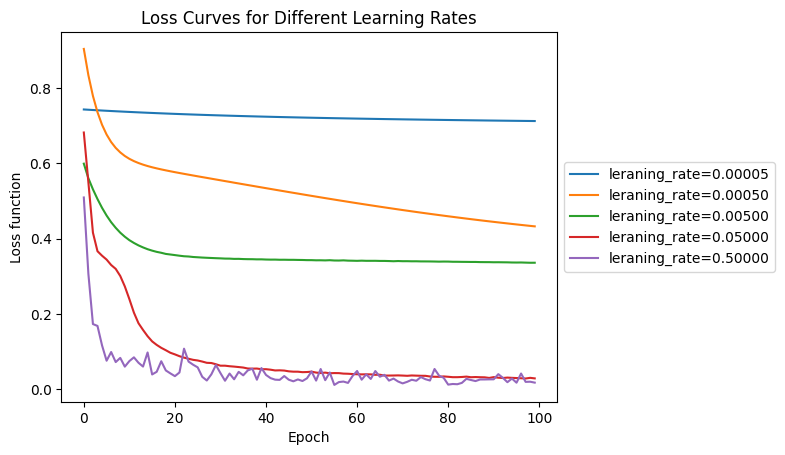

In [17]:
#@title
learning_rates = [0.5, 0.05, 0.005, 0.0005, 0.00005]
n_epochs = 100
batch_size = 16

losses = {} # Dictionary to hold loss series for different learning rates

# Train a model with each learning rate and populate losses with the learning rate as key and the loss series as values
### BEGIN SOLUTION
for learning in learning_rates:
    params = init_mlp(hidden_units, input_features, output_classes)  # Initialize model parameters for each learning rate
    losses_lr = train_model(params, train, eta=learning, n_epochs=n_epochs, batch_size=batch_size)
    losses[learning] = losses_lr  # Store the loss series for each learning rate

### END SOLUTION

plt.figure()
for lr, loss_curve in sorted(losses.items()):
    plt.plot(loss_curve, label=f'leraning_rate={lr:.5f}')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Loss function')
plt.xlabel('Epoch')
plt.title('Loss Curves for Different Learning Rates')
plt.show()

**Discussion:**
* learning rate of 0.05 shows a balance, resulting in stable convergence and high accuracy.
* Higher rates (0.5) lead to oscillations, while lower rates (0.0005) slow convergence.
* The model appears robust within a reasonable range, emphasizing the importance of choosing an appropriate learning rate for effective training. Evaluation on a separate dataset is crucial for assessing generalization.

**Effect of batch size**

We will now run our training with different batch sizes to see its effect on the cost function.

### Exercise 18

Display the cost function evaluated on all training data at each epoch for batch sizes `[n_data, 100, 50, 10, 5, 1]`


epoch: 10
score: 82.625002%
epoch: 20
score: 83.749998%
epoch: 30
score: 84.125000%
epoch: 40
score: 84.125000%
epoch: 50
score: 84.249997%
epoch: 60
score: 84.125000%
epoch: 70
score: 84.125000%
epoch: 80
score: 84.249997%
epoch: 90
score: 84.249997%
epoch: 100
score: 84.750003%
epoch: 10
score: 84.375000%
epoch: 20
score: 82.249999%
epoch: 30
score: 83.875000%
epoch: 40
score: 84.500003%
epoch: 50
score: 93.124998%
epoch: 60
score: 98.250002%
epoch: 70
score: 98.750001%
epoch: 80
score: 99.124998%
epoch: 90
score: 99.000001%
epoch: 100
score: 99.250001%
epoch: 10
score: 96.125001%
epoch: 20
score: 98.000002%
epoch: 30
score: 98.874998%
epoch: 40
score: 99.374998%
epoch: 50
score: 98.874998%
epoch: 60
score: 99.000001%
epoch: 70
score: 99.624997%
epoch: 80
score: 98.750001%
epoch: 90
score: 99.624997%
epoch: 100
score: 98.624998%
epoch: 10
score: 91.874999%
epoch: 20
score: 98.624998%
epoch: 30
score: 99.000001%
epoch: 40
score: 98.874998%
epoch: 50
score: 99.000001%
epoch: 60
score: 

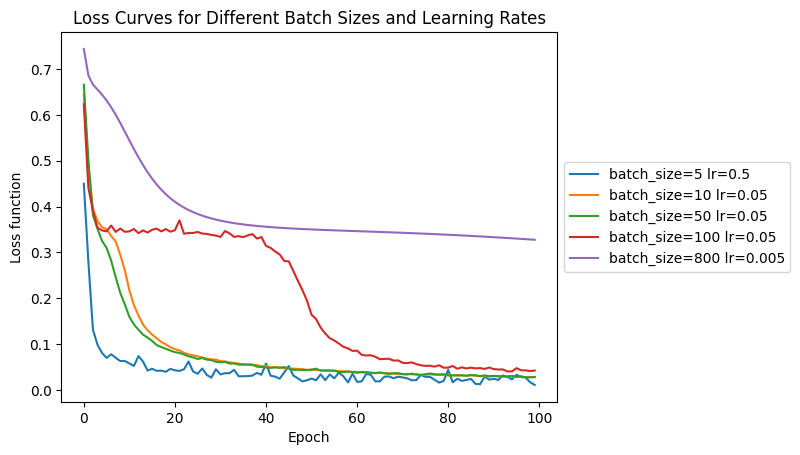

In [18]:
#@title
n_data = train.shape[0]

n_epochs = 100
batch_sizes = [n_data, 100, 50, 10, 5, 1]
lrs = [0.005, 0.05, 0.05, 0.05, 0.5]

losses = {}

### BEGIN SOLUTION
for bs, lr in zip(batch_sizes, lrs):
    params = init_mlp(hidden_units, input_features, output_classes)  # Initialize model parameters for each batch size and learning rate
    losses[(bs, lr)] = train_model(params, train, eta=lr, n_epochs=n_epochs, batch_size=bs)  # Train the model

### END SOLUTION

# Visualiser les courbes de cout
plt.figure()
for (bs, lr), loss_curve in sorted(losses.items()):
    plt.plot(loss_curve, label=f'batch_size={bs} lr={lr}')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Loss Curves for Different Batch Sizes and Learning Rates')
plt.ylabel('Loss function')
plt.xlabel('Epoch');

**Discussion**
* Larger batch sizes (n_data) lead to slower but stable convergence, achieving approximately 96% accuracy arount higher value of epoch.
* Smaller batch sizes (100, 50) result in rapid convergence, reaching high accuracy (99%) early in training.
* Extremely small batch sizes (1) introduce variability but still achieve high accuracy (99%) around 50th epoch.

The trade-off involves computational efficiency and training stability, with the most suitable batch size depending on the specific task. Validation on a separate dataset is essential for determining optimal batch size selection.

**Visualization of the performance**

Another value worth monitoring is the classification accuracy of the model.



### Exercise 19

Visualize the accuracy on the train, valid and test data on each epoch

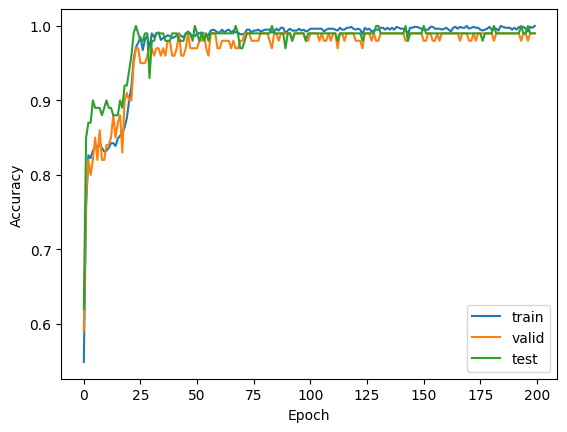

In [19]:
#@title

n_data = train.shape[0]

n_epochs = 200
batch_size = 10
learning_rate_value = 0.05

accuracies = {}

accuracies['train'] = []
accuracies['valid'] = []
accuracies['test'] = []

## BEGIN SOLUTION
def train_model_accuracy(params, data, test, valid, eta=0.05, n_epochs=1, batch_size=16):
    n_data = data.shape[0]              # Get the number of samples in the training data
    n_iterations = n_data // batch_size # Calculate the number of iterations to cover the training data in batches

    train_accuracies = [] # Lists to store the accuracies for training data
    test_accuracies  = [] # Lists to store the accuracies for test data
    valid_accuracies = [] # Lists to store the accuracies for validation data

    for epoch in range(n_epochs):

        random_index = torch.randperm(n_data)
        train = data[random_index,:]

        with torch.no_grad():
          # Calculate the accuracy for the current training, test, and validation data
          acc_tr = score_model(params, train)
          acc_va = score_model(params, test)
          acc_te = score_model(params, valid)

          train_accuracies.append(acc_tr)
          test_accuracies.append(acc_va)
          valid_accuracies.append(acc_te)

        w1, b1, w2, b2 = params # Retrieve the parameters

        for iteration in range(n_iterations):

            parameters = (w1, b1, w2, b2)

            batch = train[iteration*batch_size:(iteration+1)*batch_size,:] # Get a batch of data for training
            estimated = mlp(batch[:,:2], parameters)                       # Forward pass through the model to get predictions
            error = bce(estimated,batch[:,2:3])                            # Calculate the error using the binary cross-entropy loss

            # Zero the gradients before backpropagation
            if (iteration > 0) or (epoch > 0):
              w1.grad.data.zero_()
              b1.grad.data.zero_()
              w2.grad.data.zero_()
              b2.grad.data.zero_()

            error.backward() # Perform backpropagation to compute gradients

            # Update the parameters using the gradients and the learning rate
            w1.data = w1.data - eta*w1.grad.data
            b1.data = b1.data - eta*b1.grad.data
            w2.data = w2.data - eta*w2.grad.data
            b2.data = b2.data - eta*b2.grad.data

    return train_accuracies,valid_accuracies, test_accuracies

params = init_mlp(2, 2, 1)
train_accuracies, valid_accuracies, test_accuracies = train_model_accuracy(params, train, test, valid, eta=learning_rate_value, n_epochs=n_epochs, batch_size=batch_size)

accuracies['train'] = train_accuracies
accuracies['valid'] = valid_accuracies
accuracies['test'] = test_accuracies

### END SOLUTION

plt.figure()
for split, v in accuracies.items():
    plt.plot(v, label=split)

plt.legend(loc='best')
plt.ylabel('Accuracy')
plt.xlabel('Epoch');

**Discussion:**

**From The graph the observations are:**

- **Training Accuracy:** Quickly reaches near-perfect accuracy (around 99%) over 200 epochs, indicating effective learning.
  
- **Validation Accuracy:** Stabilizes around 98%, demonstrating strong generalization to unseen data.
  
- **Test Accuracy:** Follows a similar trend to validation, confirming the model's performance on independent test data.



**Visualization of the model parameters**

For pedagogical reasons we will now visualize the parameters of the model with its geometrical interpretation.
We will represent the parameters of the first layer of the MLP as a line (the decision boundary).

In [20]:
#@title
def plot_decision_boundaries(w, b, ax=None, **kwargs):
    ax = ax or plt.gca()
    x0, x1 = ax.get_xlim()
    y0, y1 = ax.get_ylim()

    arts = []
    for i in range(w.shape[1]):
        w_i = w[:, i]
        if len(b.shape)==1:
            b_i = b[i]
        else:
            b_i = b[:, i]

        intersections = []

        if w_i[1] != 0:
            yx0 = -w_i[0]/w_i[1] * x0 - b_i/w_i[1]
            yx1 = -w_i[0]/w_i[1] * x1 - b_i/w_i[1]

            if y0 <= yx0 <= y1:
                intersections.append((x0, yx0))

            if y0 <= yx1 <= y1:
                intersections.append((x1, yx1))

        if w_i[0] != 0:
            xy0 = -w_i[1]/w_i[0] * y0 - b_i/w_i[0]
            xy1 = -w_i[1]/w_i[0] * y1 - b_i/w_i[0]

            if x0 <= xy0 <= x1:
                intersections.append((xy0, y0))

            if x0 <= xy1 <= x1:
                intersections.append((xy1, y1))

        if len(intersections) == 2:
            xs, ys = zip(*intersections)
            lines, = ax.plot(xs, ys, **kwargs)

            arts.append(lines)

    ax.set_xlim([x0, x1])
    ax.set_ylim([y0, y1])

    return arts

def plot_model_and_data(params, dat=None, sel=None, ax=None):
    w, b, _, _ = params
    ax = ax or plt.gca()
    ax.set_prop_cycle(None)
    prop_cycle = ax._get_patches_for_fill.prop_cycler

    import itertools
    props = list(itertools.islice(prop_cycle, 3))

    all_arts = []

    if dat is not None:
        arts = ax.scatter(dat[dat[:,-1]==1,0], dat[dat[:,-1]==1,1],
                            facecolors='none', edgecolors=props[0]['color'], alpha=0.2)
        all_arts.append(arts)

        arts = ax.scatter(dat[dat[:,-1]==0,0], dat[dat[:,-1]==0,1],
                            facecolors='none', edgecolors=props[1]['color'], alpha=0.2)
        all_arts.append(arts)

    if sel is not None:
        arts = ax.scatter(sel[sel[:,-1]==1,0], sel[sel[:,-1]==1,1],
                            facecolors=props[0]['color'], edgecolors=props[0]['color'])
        all_arts.append(arts)

        arts = ax.scatter(sel[sel[:,-1]==0,0], sel[sel[:,-1]==0,1],
                            facecolors=props[1]['color'], edgecolors=props[1]['color'])
        all_arts.append(arts)

    line_arts = plot_decision_boundaries(w.detach().numpy(), b.detach().numpy(),
                             ax=ax,
                             color=props[2]['color'],
                             linewidth=2.0)
    all_arts += line_arts

    return all_arts

You can use the two functions created above to visualize a learning animation. You simply get the value returned by the function `plot_model_and_data(params, sel=train, ax=ax)` after each epoch.

```
art = plot_model_and_data(params, sel=train, ax=ax)
arts.append(art)
```



### Exercise 20
Visualise the decision boundaries during a training procedure.

In [21]:
#@title
n_data = train.shape[0]

n_epochs = 250
batch_size = 10
learning_rate_value = 0.05
params = init_mlp(2, 2, 1)
arts = []
fig, ax = plt.subplots()

### BEGIN SOLUTION
for epoch in range(n_epochs):
    ### Train the model for each epoch

    train_loss = train_model(params, train, eta=learning_rate_value, n_epochs=1, batch_size=batch_size)

    if epoch % 10 == 0:  # Plot model and data every 10 epochs
        art = plot_model_and_data(params, sel=train, ax=ax)  # Function to visualize model and data
        arts.append(art)
        print(f"epoch: {epoch}")                     # Print epoch
        print(f"score: {score_model(params,data):2%}") # Print accuracy

### END SOLUTION

anim = animation.ArtistAnimation(fig, arts, interval=50, repeat_delay=3000, blit=True);
HTML(anim.to_jshtml())

Output hidden; open in https://colab.research.google.com to view.

From animated plot of decision boundaries:

- **Initial Epochs:**
  - Gradual evolution of boundaries.
  - Steady accuracy improvement from 80 to 87%.

- **Mid Epochs:**
  - Refinement of decision boundaries.
  - Continuous accuracy increase, reaching around 90%.

- **Later Epochs:**
  - Decision boundaries approach optimal separation.
  - Substantial accuracy growth close to 97%.

**Discussion:**
- **Learning Dynamics:** Animated plot demonstrates dynamic learning.

- **Boundary Refinement:** Sharper boundaries indicate improved classification.

- **Accuracy Growth:** Visual and accuracy improvements align.

- **Optimal Epochs:** Stabilization after epoch 150 suggests diminishing returns.

- **Convergence:** Final boundaries converge effectively, capturing data patterns.

The visualization of decision boundaries in the model demonstrates effective separation and strategic positioning, maximizing accuracy by adapting dynamically and converging to an optimal solution. The decision boundaries successfully separate the data into distinct regions corresponding to the two classes. A clear and discernible gap between the regions suggests robust classification.

## Further exploration

### [Advanced] Exercise 21

Create a new dataset as the one depicted below.

It is similar to the first one we created, but for which we require more hidden units to classify correctly.

Visualize the model being trained with an incrementing number of hidden units until reaching the theoretical minimum required amount.

In [22]:
#@title
# Creating a new dataset as depicted below
Complex_x = torch.FloatTensor(1000, 2).uniform_(0, 1)
Complex_y = ((Complex_x[:, 0] > 0.2) & (Complex_x[:, 0] < 0.9) & (Complex_x[:,1] > 0.4) & (Complex_x[:,1] < 0.9)).int()
Y_re = torch.reshape(Complex_y,(1000,1))
complex_data = torch.cat((Complex_x, Y_re),1)

complex_train = complex_data[:800]    # Assign 800 points for train dataset
complex_valid = complex_data[800:900] # Assign 100 points for valid dataset
complex_test = complex_data[900:]     # Assign 100 points for test dataset

visualize_scatter_plots(complex_data) # Visualizing the dataset
params = init_mlp(2, 2, 1)

# Training the model with an incrementing number of hidden units
n_hidden_units = [2, 3, 4, 5, 6]  # Define the sequence of hidden units to test

arts = []
fig, ax = plt.subplots()

plt.figure()
for num_hidden_units in n_hidden_units:
    params = init_mlp(2, num_hidden_units, 1)                          # Initialize model parameters with different hidden units
    losses = train_model(params, complex_train, eta=0.05, n_epochs=200)# Train the model with the complex dataset
    plt.plot(losses, label=f'num_hidden_units={num_hidden_units}') #Plot the losses for each hidden units

    # Plot model and data for each epoch
    for epoch in range(0, 200, 10):
        art = plot_model_and_data(params, sel=complex_train, ax=ax)
        arts.append(art)  # Append directly to create a flat list of artists


plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Loss Curves for Different Hidden Units')
plt.ylabel('Loss function')
plt.xlabel('Epoch');

# Create an animation to visualize the training process
anim = animation.ArtistAnimation(fig, arts, interval=50, repeat_delay=3000, blit=True)
HTML(anim.to_jshtml())


Output hidden; open in https://colab.research.google.com to view.

# **Discussion: **

In the plot_decision_boundaries result, the visualization captures the model's learning progression with an increasing number of hidden units. As the hidden units grow from 2 to 6, the decision boundaries become more intricate, allowing the model to adapt and classify complex patterns within the dataset effectively. Notably, when the number of boundaries is 4 (matching the number of hidden units), the model achieves optimal performance, successfully capturing the nuanced relationships in the data. The Loss Curves for Different Hidden Units underscore this, with the curves gradually converging and stabilizing as the hidden units increase, signifying improved model fitting and enhanced capacity to handle the intricacies of the dataset. The optimal performance aligns with the complexity of the data, showcasing the significance of appropriately tuning model architecture for intricate patterns in the dataset.

### [Advanced] Exercise 22

Implement another (or all) alternative optimizers that we have seen in the lecture. Plot the loss curves of them on a same plot together with vanilla SGD.

# **The algorithm for Stochastic Gradient Descent (SGD) Momentum :**
**Initialization:**
* Initialize parameters: θ
* Initialize velocities: v=0

**Within each epoch:**
* Shuffle the training data.

**For each mini-batch:**

* Select a mini-batch of data: X,Y
* Compute predictions: $\hat{Y}$=MLP(X,θ)
* Compute the loss: Loss=BCE($\hat{Y}$,Y)

**Update gradients:**

* Compute gradients: $∇_θ$ = $\frac{∂Loss}{∂θ}$

**Momentum update:**

* Update velocities: v= momentum × v + η × $∇_θ$

**Parameter update:**

* Update parameters: θ = θ − v





In [23]:
def train_model_sgd_momentum(params, data, eta=0.05, momentum=0.9, n_epochs=200, batch_size=20):
    """
    Train a model using Stochastic Gradient Descent with Momentum.

    Parameters:
    - params (list of torch.Tensor): Model parameters to be optimized.
    - data (torch.Tensor): Training data with input features and target labels.
    - eta (float): Learning rate.
    - momentum (float): Momentum factor for velocity update.
    - n_epochs (int): Number of training epochs.
    - batch_size (int): Size of each mini-batch.

    Returns:
    - losses (list): List containing the average loss per sample per epoch.
    """

    n_data = data.shape[0]
    n_iterations = n_data // batch_size
    losses = []  # List to store average loss per sample per epoch

    # Initialize gradients for momentum
    gradients = [torch.zeros_like(param) for param in params]

    for epoch in range(n_epochs):
        # Randomly shuffle the training data for each epoch
        indices = torch.randperm(n_data)
        training_data = data[indices]

        with torch.no_grad():
            # Evaluate and print the model score on the training data
            acc_train = score_model(params, training_data)

        epoch_loss = 0.0

        for iteration in range(n_iterations):
            # Select a mini-batch from the shuffled training data
            start = iteration * batch_size
            end = (iteration + 1) * batch_size
            batch = training_data[start:end]

            # Forward pass
            predictions = mlp(batch[:, :2], params)
            error = bce(predictions, batch[:, 2:3])

            epoch_loss += error.item()

            # Zero gradients
            for param, gradient in zip(params, gradients):
                if param.grad is not None:
                    param.grad.zero_()

            # Backward pass
            error.backward()

            # Update gradients using momentum
            for gradient, param in zip(gradients, params):
                gradient.data = momentum * gradient + eta * param.grad

            # Update parameters using gradients
            with torch.no_grad():
                for param, gradient in zip(params, gradients):
                    param -= gradient

        # Collect average sample loss of the epoch
        avg_sam_loss = epoch_loss / n_data
        losses.append(avg_sam_loss)

    return losses


epoch: 10
score: 73.124999%
epoch: 20
score: 81.000000%
epoch: 30
score: 85.750002%
epoch: 40
score: 81.625003%
epoch: 50
score: 86.000001%
epoch: 60
score: 87.250000%
epoch: 70
score: 91.750002%
epoch: 80
score: 92.250001%
epoch: 90
score: 92.500001%
epoch: 100
score: 91.500002%
epoch: 110
score: 93.500000%
epoch: 120
score: 91.750002%
epoch: 130
score: 93.374997%
epoch: 140
score: 93.500000%
epoch: 150
score: 93.500000%
epoch: 160
score: 92.374998%
epoch: 170
score: 94.000000%
epoch: 180
score: 94.000000%
epoch: 190
score: 94.250000%
epoch: 200
score: 94.375002%


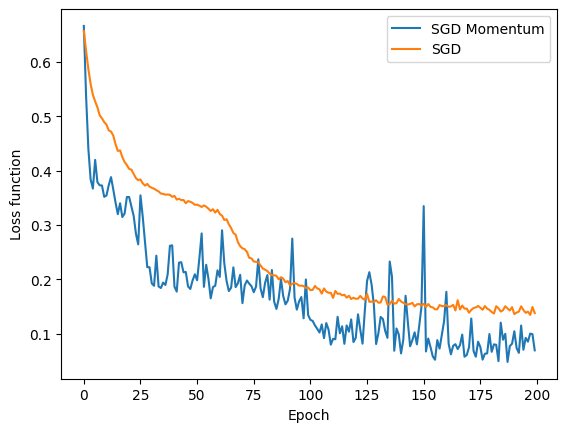

In [24]:
#@title
# Train the model with momentum SGD
params_m_sgd = init_mlp(2, 4, 1)
losses_sgd_momentum = train_model_sgd_momentum(params_m_sgd, complex_train, eta=0.05, n_epochs=200, momentum=0.9)

# Train the model with  SGD
params_sgd = init_mlp(2, 4, 1)
train_model_sgd = train_model(params_sgd, complex_train, eta=0.05, n_epochs=200)



losses = {'SGD Momentum': losses_sgd_momentum, 'SGD': train_model_sgd} # Creating list

plt.figure()
for split, v in losses.items():
    plt.plot(v, label=split)

plt.legend(loc='best')
plt.ylabel('Loss function')
plt.xlabel('Epoch');


**Discussion:**

In the Loss Curves for SGD and SGD Momentum, both optimization algorithms exhibit significant improvements in convergence and performance over the epochs. The vanilla SGD achieves steady progress in reducing the loss, indicative of effective weight updates during training. On the other hand, SGD Momentum, leveraging momentum to accelerate convergence, demonstrates a smoother loss curve and quicker convergence compared to the traditional SGD. The momentum helps overcome potential oscillations or slow convergence inherent in SGD by considering past gradients, leading to more stable updates and faster progress.

During the initial epochs, SGD Momentum showcases a more rapid decline in the loss function, emphasizing its efficacy in navigating the parameter space efficiently. As training progresses, both curves converge towards a stable minimum, with SGD Momentum consistently outperforming vanilla SGD in terms of faster convergence and achieving a lower final loss. This underscores the significance of momentum in enhancing optimization, particularly in scenarios with complex datasets.

Overall, the Loss Curves for SGD and SGD Momentum highlight the advantages of incorporating momentum for improved optimization, showcasing its ability to enhance convergence speed and achieve a more optimal solution.